### Task 🧟‍♂️💻

- Step 1: Download the dataset from the link available above. 

- Step 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.

- Step 3: Build a Machine Learning Model to predict output based on the input column.

- Step 4: Make sure to apply:

        - Proper outlier detection and treatment.

        - Feature Engineering

        -  Hyperparameter Tuning

- Step 5: Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?

- Step 6: Build a Linear Regression model by performing appropriate feature engineering.

- Step 7: Zip your jupyter notebook and upload it on the 👉 Submission Link (LIVE NOW)

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data int python
data=pd.read_csv(r"C:\Users\Berger\Downloads\dataframe_.csv")
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [3]:
#shape of the dataset
data.shape

(1697, 2)

In [4]:
#decsriptive statistics and data distribution
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [5]:
#summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


### Data preprocessing

In [6]:
#checking for missing values
data.isnull().sum()

input     1
output    1
dtype: int64

In [7]:
# there is one null values each

In [8]:
# handle the missing vaues using imputation techique
#we can drop or treat the missing value 

from sklearn.impute import SimpleImputer

mean_impute= SimpleImputer(missing_values=np.nan,strategy='mean')
data['input']= pd.DataFrame(mean_impute.fit_transform(data[['input']]))
data['output']= pd.DataFrame(mean_impute.fit_transform(data[['output']]))

In [9]:
#verifying for missing values after treatment
data.isnull().sum()

input     0
output    0
dtype: int64

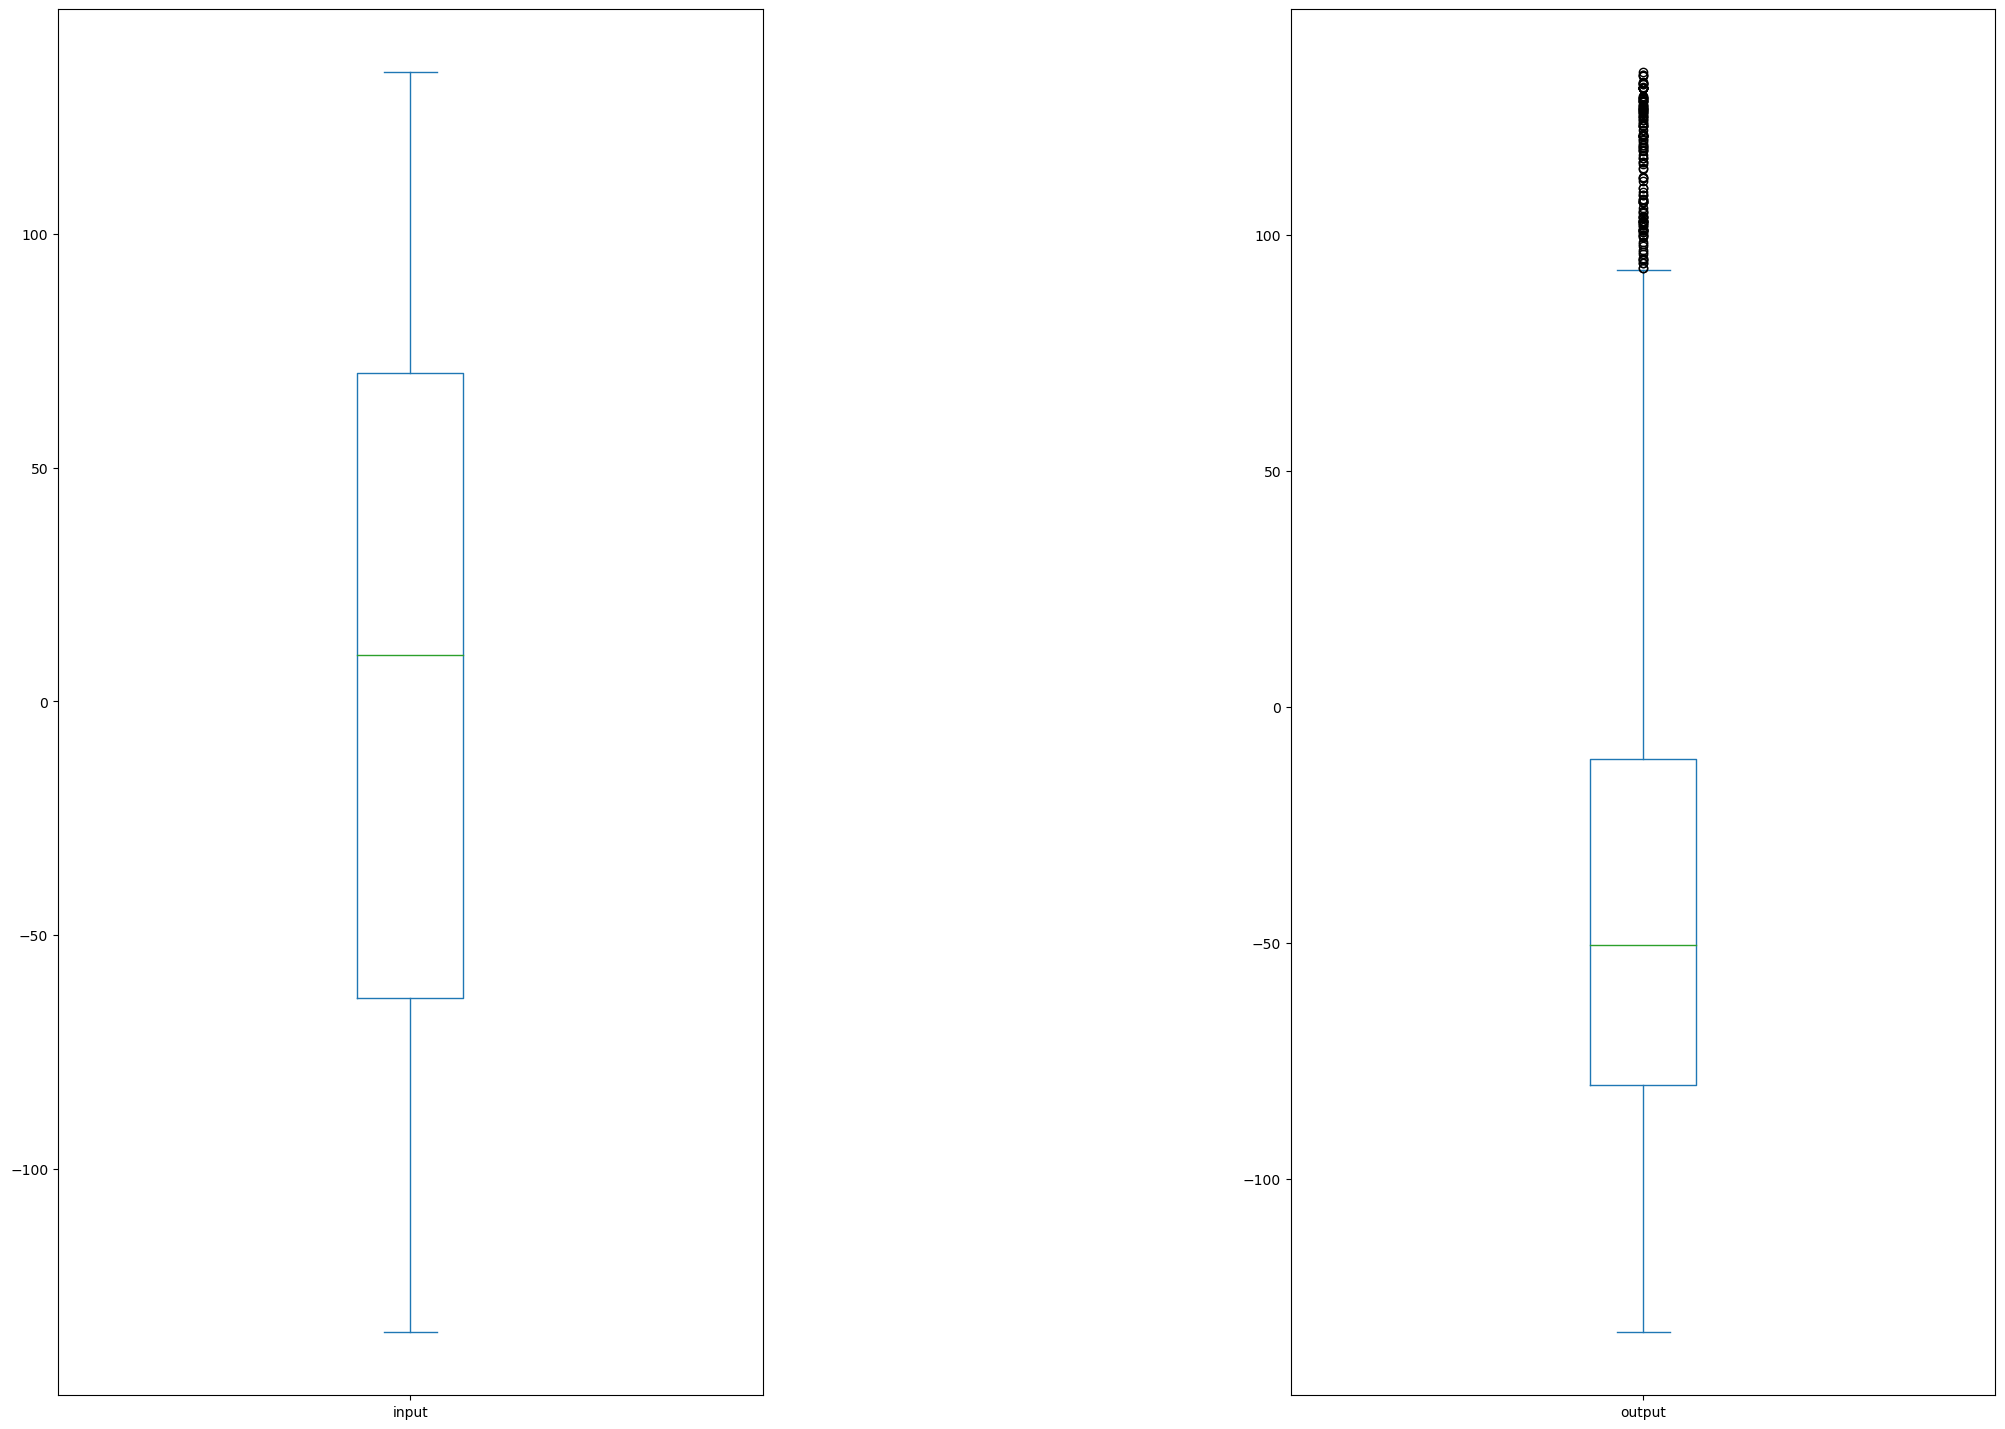

In [10]:
#checking for outlier treatment
data.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

In [11]:
# Winsorization for outlier treatment
from feature_engine.outliers import Winsorizer

winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['output'])
data['output'] = winsor.fit_transform(data[['output']])

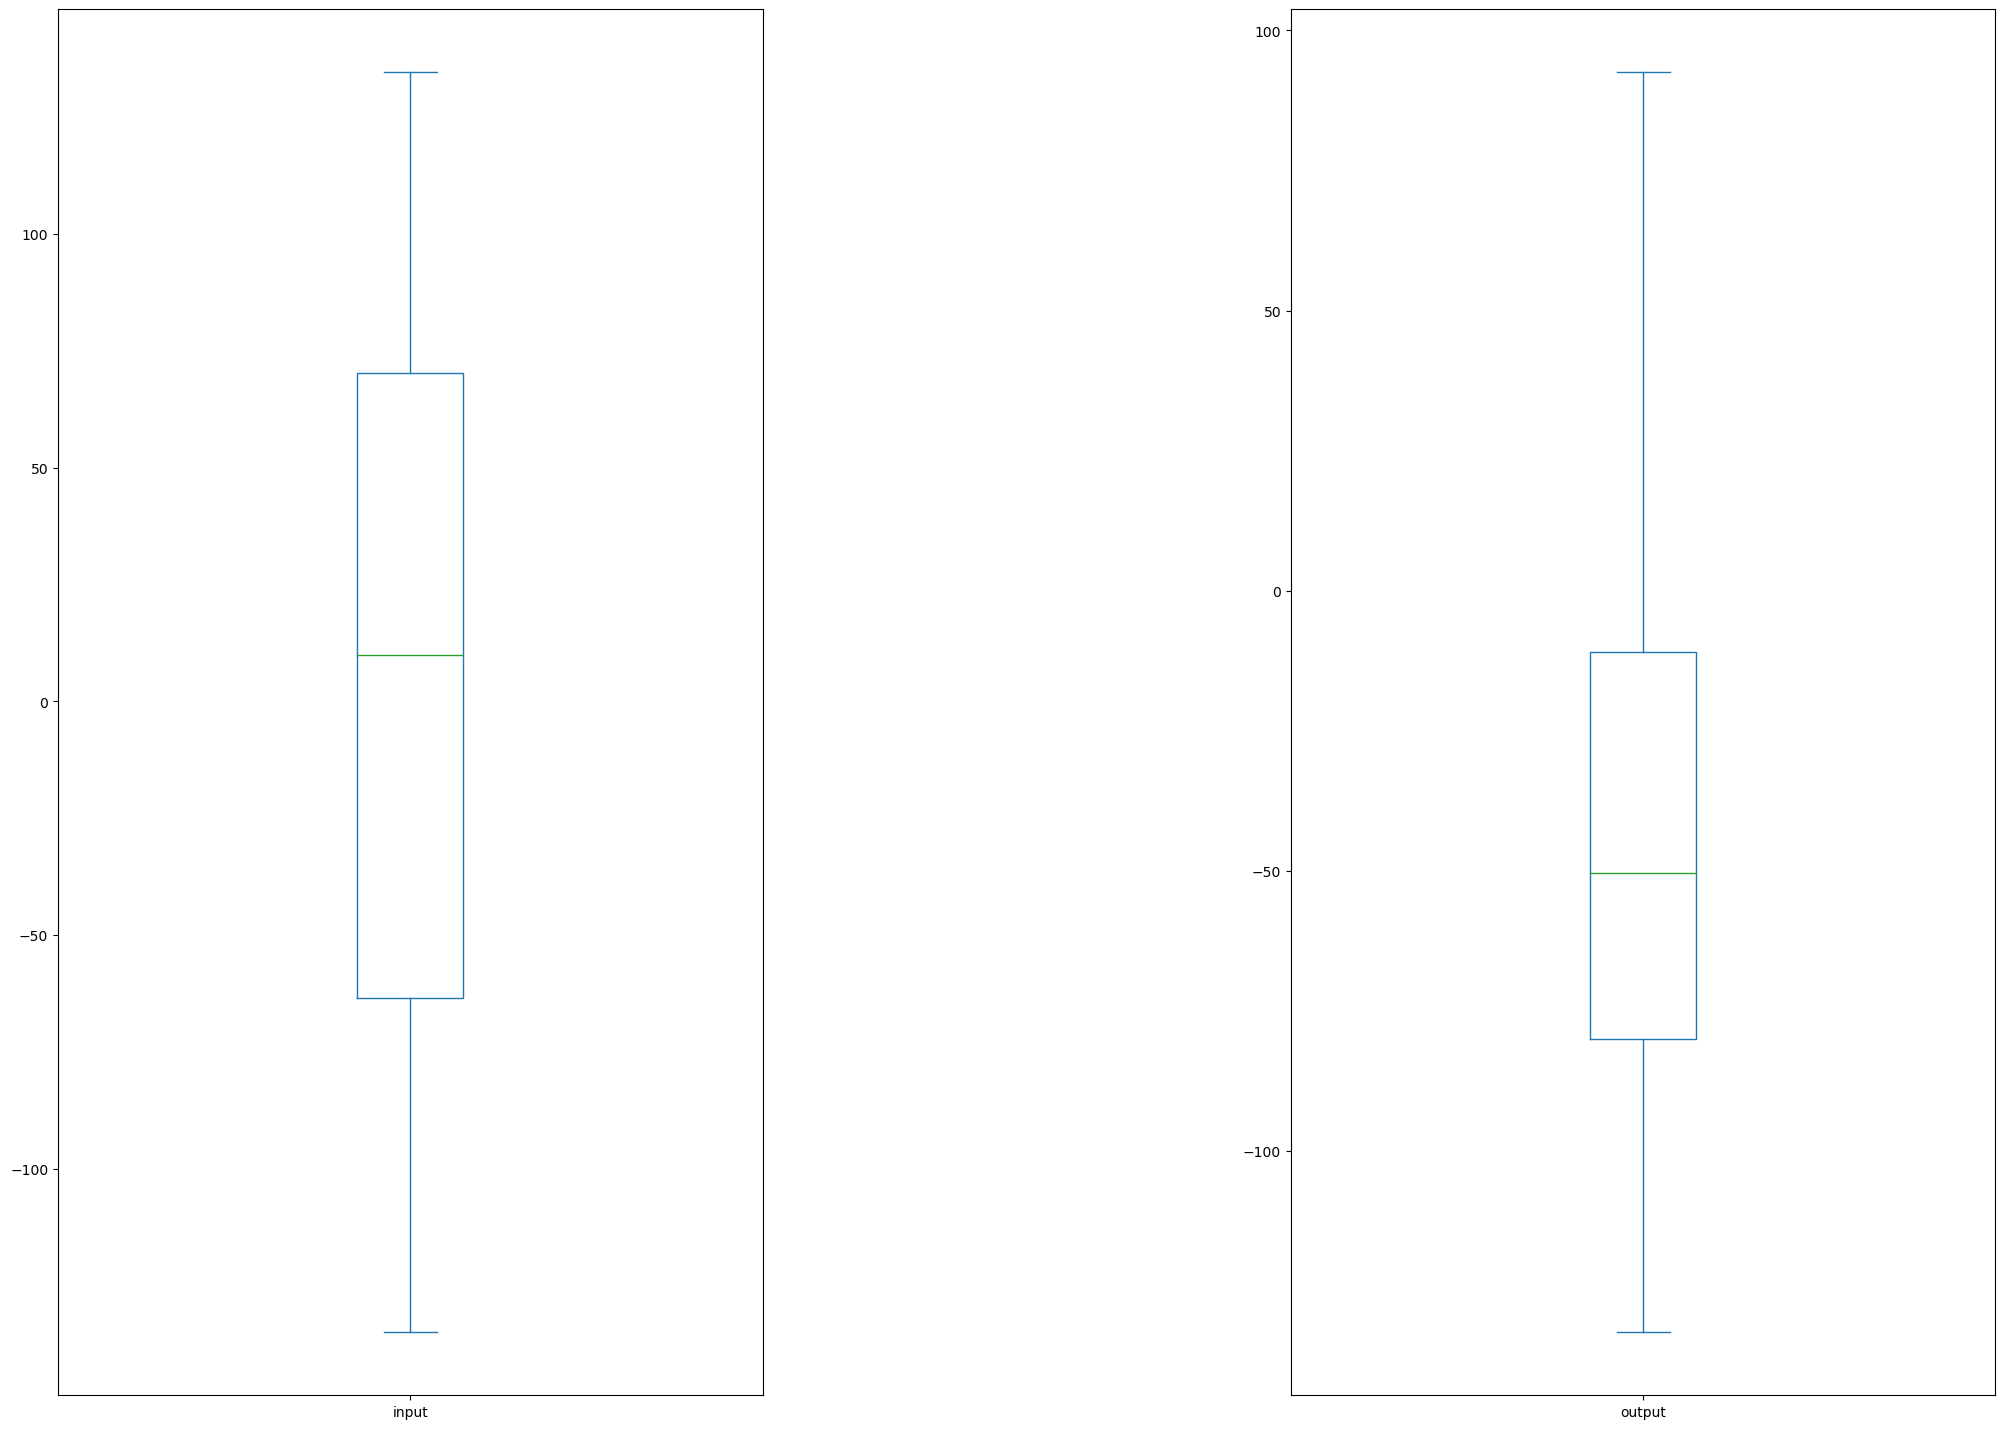

In [12]:
#verifying for outlier after treatment
data.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

# Graphical Representation

(array([272., 109.,  76., 152., 152., 220., 187., 195., 189., 145.]),
 array([-134.9628386 , -108.00597722,  -81.04911584,  -54.09225446,
         -27.13539308,   -0.1785317 ,   26.77832968,   53.73519106,
          80.69205244,  107.64891382,  134.6057752 ]),
 <BarContainer object of 10 artists>)

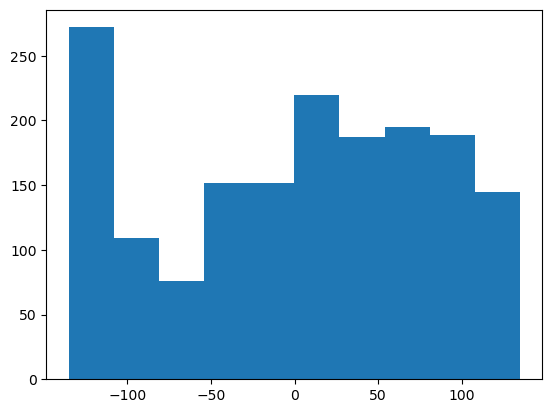

In [13]:
#histogram 
plt.hist(data.input)

(array([101., 225., 339., 308., 252., 102.,  64.,  52.,  55., 199.]),
 array([-132.422167  , -109.9259353 ,  -87.42970361,  -64.93347191,
         -42.43724021,  -19.94100851,    2.55522318,   25.05145488,
          47.54768658,   70.04391828,   92.54014997]),
 <BarContainer object of 10 artists>)

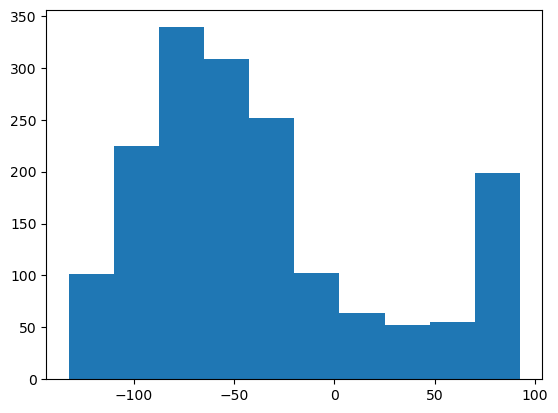

In [14]:
plt.hist(data.output)

## Auto eda

In [15]:
import sweetviz as sv

# Analyzing the dataset
report = sv.analyze(data)

# Display the report
report.show_notebook()

### bivariate analysis

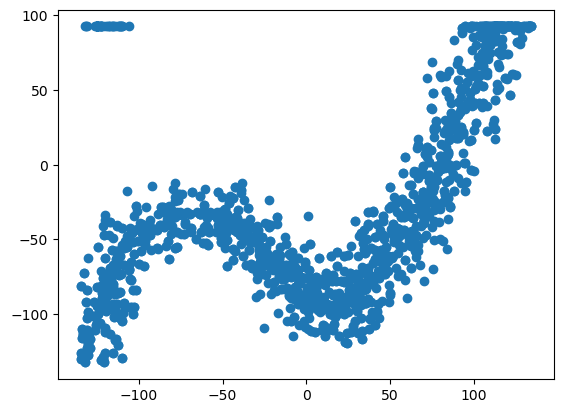

In [16]:
#scatter plot
plt.scatter(x = data['input'], y = data['output'])

In [17]:
## Measure the strength of the relationship between two variables using Correlation coefficient.

np.corrcoef(data.input, data.output) 


array([[1.        , 0.53850602],
       [0.53850602, 1.        ]])

In [18]:
# Covariance
cov_output = np.cov(data.input, data.output)[0, 1]
cov_output

2608.1236633989492

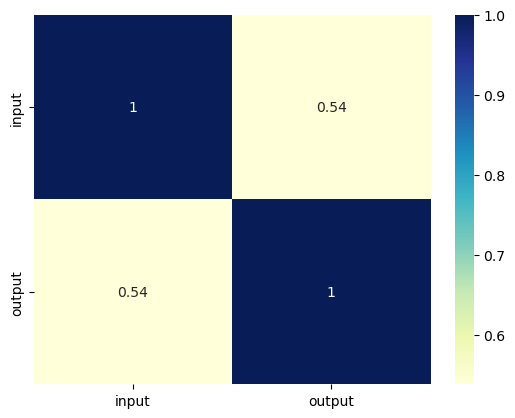

In [19]:
#heat map
import seaborn as sb

dataplot = sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## Linear Regression using statsmodels package

In [20]:
# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('output ~ input', data = data).fit() # ordinary least square

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     692.3
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          3.18e-128
Time:                        16:42:53   Log-Likelihood:                -9101.9
No. Observations:                1697   AIC:                         1.821e+04
Df Residuals:                    1695   BIC:                         1.822e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.5475      1.255    -29.126      0.000     -39.009     -34.086
input          0.4181      0.016     26.311      0.000       0.387       0.449
==============================================================================
Omnibus:                      240.972   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.967
Skew:                           0.927   Prob(JB):                     1.56e-89
Kurtosis:                       4.532   Cond. No.                         79.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
pred1 = model.predict(pd.DataFrame(data['input']))

pred1

0      -87.863497
1      -87.357928
2      -92.954246
3      -86.971004
4      -90.854524
          ...    
1692   -25.923860
1693   -24.198373
1694   -23.322056
1695   -24.384775
1696   -29.379285
Length: 1697, dtype: float64

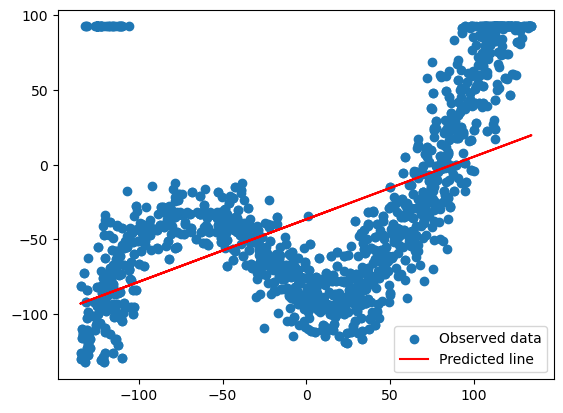

In [23]:
# Regression Line
plt.scatter(data.input, data.output)
plt.plot(data.input, pred1, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()


In [24]:
# Error calculation (error = AV - PV)
res1 = data.output - pred1

res1

0      -42.708588
1      -42.581000
2      -37.187586
3      -38.789928
4      -21.930690
          ...    
1692   -50.457042
1693   -58.598561
1694   -63.677944
1695   -80.558278
1696   -72.347609
Length: 1697, dtype: float64

In [25]:
print(np.mean(res1))

res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

-2.686412606150149e-14


51.65476613604997

C:\Users\Berger\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[nan, nan],
       [nan,  1.]])

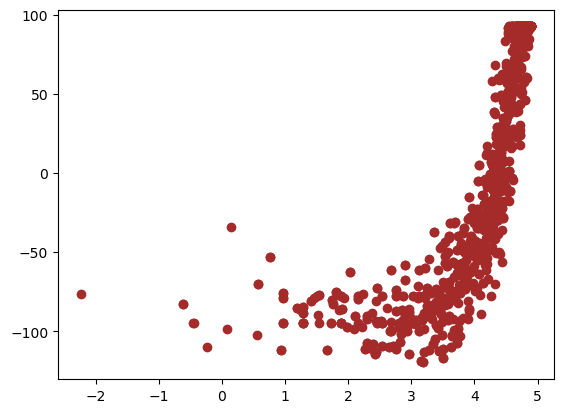

In [26]:
######### Model building on Transformed Data
# Log Transformation
# x = log(input); y = output

plt.scatter(x = np.log(data['input']), y = data['output'], color = 'brown')
np.corrcoef(np.log(data.input), data.output) #correlation


In [27]:
model2 = smf.ols('output ~ np.log(input)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1144.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          3.19e-164
Time:                        16:42:54   Log-Likelihood:                -4887.5
No. Observations:                 934   AIC:                             9779.
Df Residuals:                     932   BIC:                             9789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -207.9232      5.787    -35.928      0.000    -219.281    -196.566
np.log(input)    49.6763      1.469     33.817      0.000      46.793      52.559
==============================================================================
Omnibus:                       45.501   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.912
Skew:                           0.560   Prob(JB):                     8.80e-12
Kurtosis:                       3.236   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Berger\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Berger\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


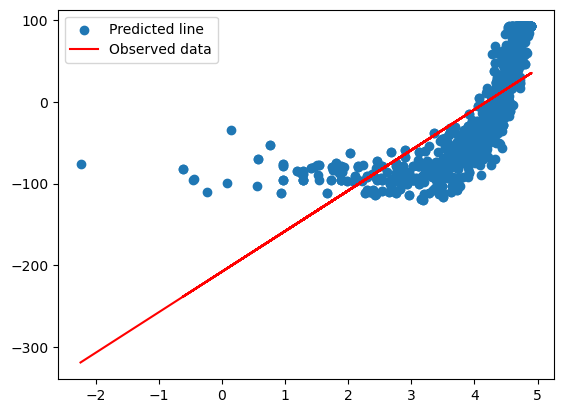

In [28]:
pred2 = model2.predict(pd.DataFrame(data['input']))

# Regression Line
plt.scatter(np.log(data.input), data.output)
plt.plot(np.log(data.input), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [29]:
# Error calculation
res2 = data.output - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2


45.32746271476994

array([[ 1., nan],
       [nan, nan]])

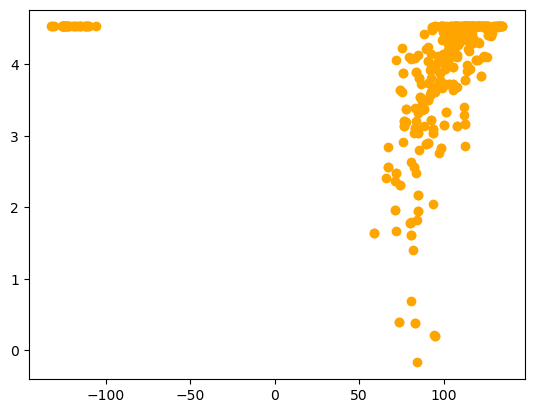

In [30]:
#### Exponential transformation
# x = input; y = log(output)

plt.scatter(x = data['input'], y = np.log(data['output']), color = 'orange')
np.corrcoef(data.input, np.log(data.output)) #correlation

In [31]:
model3 = smf.ols('np.log(output) ~ input', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(output)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.454
Date:                Sat, 11 Feb 2023   Prob (F-statistic):              0.118
Time:                        16:42:55   Log-Likelihood:                -505.63
No. Observations:                 379   AIC:                             1015.
Df Residuals:                     377   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9774      0.072     55.329      0.000       3.836       4.119
input         -0.0011      0.001     -1.567      0.118      -0.002       0.000
==============================================================================
Omnibus:                      162.874   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.096
Skew:                          -2.008   Prob(JB):                    3.18e-118
Kurtosis:                       7.259   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Berger\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


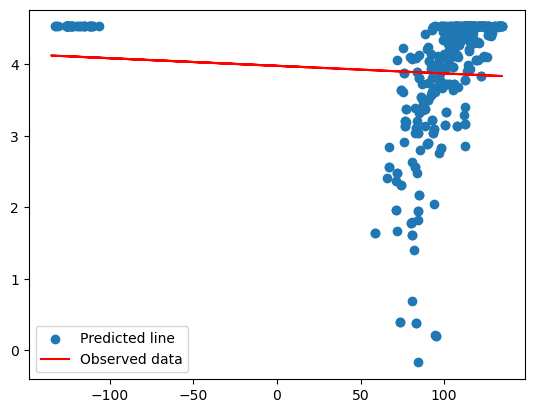

In [32]:
pred3 = model3.predict(pd.DataFrame(data['input']))

# Regression Line
plt.scatter(data.input, np.log(data.output))
plt.plot(data.input, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [33]:
pred3_op = np.exp(pred3)
print(pred3_op)

# Error calculation
res3 = data.output - pred3_op
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0       60.828958
1       60.750731
2       61.622299
3       60.690929
4       61.293833
          ...    
1692    51.956491
1693    51.728798
1694    51.613543
1695    51.753347
1696    52.415481
Length: 1697, dtype: float64


109.9493771753831

In [34]:
data=data.sort_values(['input'])
data

,input,output
1571,-134.962839,-81.540037
833,-134.962839,-81.540037
2,-134.917019,-130.141832
1113,-134.917019,-130.141832
867,-134.407988,-125.921497
...,...,...
477,133.358935,92.540150
474,133.907372,92.540150
1468,134.463181,92.540150
357,134.463181,92.540150


In [35]:
#### Polynomial transformation 
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(output) ~ input + I(input*input)', data = data).fit()
model4.summary()

C:\Users\Berger\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(output)   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           2.07e-49
Time:                        16:42:55   Log-Likelihood:                -393.87
No. Observations:                 379   AIC:                             793.7
Df Residuals:                     376   BIC:                             805.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8569      0.133     13.936      0.000       1.595       2.119
input             4.862e-05      0.001      0.095      0.924      -0.001       0.001
I(input * input)     0.0002   1.04e-05     17.383      0.000       0.000       0.000
==============================================================================
Omnibus:                      170.373   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.696
Skew:                          -1.900   Prob(JB):                    3.10e-185
Kurtosis:                       9.275   Cond. No.                     4.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
pred4 = model4.predict(pd.DataFrame(data))
print(pred4)
print('\n')
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
print(X_poly)

1571    5.155308
833     5.155308
2       5.153066
1113    5.153066
867     5.128216
          ...   
477     5.090268
474     5.116890
1468    5.143982
357     5.143982
1067    5.150950
Length: 1697, dtype: float64


[[ 1.00000000e+00 -1.34962839e+02  1.82149678e+04]
 [ 1.00000000e+00 -1.34962839e+02  1.82149678e+04]
 [ 1.00000000e+00 -1.34917019e+02  1.82026020e+04]
 ...
 [ 1.00000000e+00  1.34463181e+02  1.80803470e+04]
 [ 1.00000000e+00  1.34463181e+02  1.80803470e+04]
 [ 1.00000000e+00  1.34605775e+02  1.81187147e+04]]


C:\Users\Berger\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


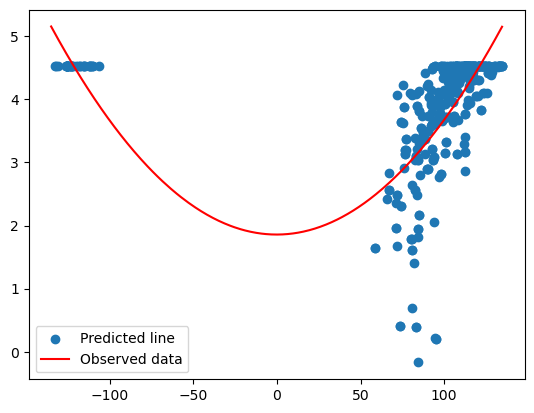

In [37]:
plt.scatter(data.input, np.log(data.output))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [38]:
pred4_op = np.exp(pred4)
pred4_op

# Error calculation
res4 = data.output - pred4_op
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

94.48741971888794

In [39]:
# Choose the best model using RMSE
df = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(df)
table_rmse


,MODEL,RMSE
0,SLR,51.654766
1,Log model,45.327463
2,Exp model,109.949377
3,Poly model,94.487420


### evluate the best model

C:\Users\Berger\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


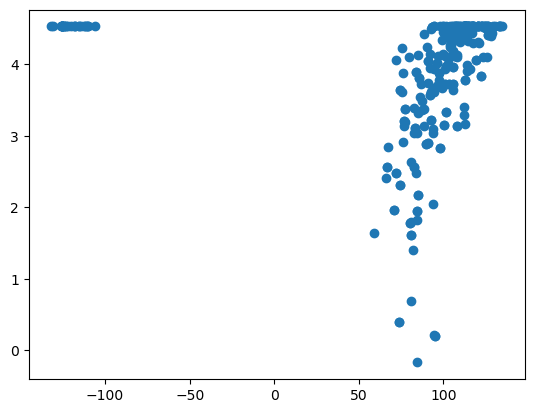

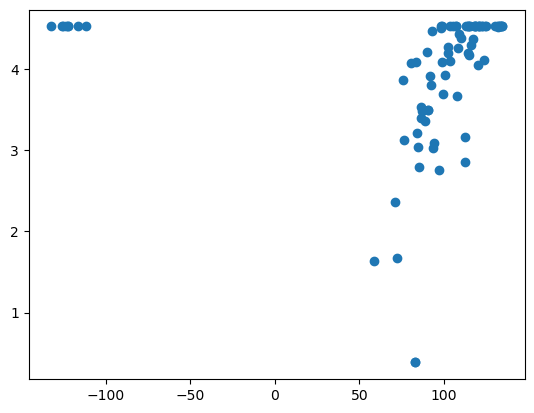

In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)

plt.scatter(train.input, np.log(train.output))

plt.figure(2)
plt.scatter(test.input, np.log(test.output))

In [41]:
# Fit the best model on train data
finalmodel = smf.ols('np.log(output) ~ input + I(input*input)', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(output)   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           4.03e-39
Time:                        16:42:55   Log-Likelihood:                -310.42
No. Observations:                 296   AIC:                             626.8
Df Residuals:                     293   BIC:                             637.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7539      0.156     11.256      0.000       1.447       2.061
input                0.0001      0.001      0.230      0.818      -0.001       0.001
I(input * input)     0.0002   1.24e-05     15.429      0.000       0.000       0.000
==============================================================================
Omnibus:                      136.479   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.345
Skew:                          -1.893   Prob(JB):                    2.73e-146
Kurtosis:                       9.326   Cond. No.                     4.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_op = np.exp(test_pred)
pred_test_op

743      10.741274
99       11.806531
1131    108.660597
539      18.996481
1357      7.201477
           ...    
690       5.819343
102      12.323379
681       6.694677
1468    185.250800
1399     15.219505
Length: 340, dtype: float64

In [43]:
# Model Evaluation on Test data
test_res = test.output - pred_test_op
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)

test_rmse

93.66502652862516

In [44]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_op = np.exp(train_pred)
pred_train_op

384     12.315354
1325     5.804568
309     15.703255
535     20.192238
1293     6.235902
          ...    
303     14.865634
673      6.230750
1068    78.658022
1413    20.192238
805     90.203020
Length: 1357, dtype: float64

In [45]:
# Model Evaluation on train data
train_res = train.output - pred_train_op
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)

train_rmse

95.59361789886817

#### hence the train result and test result are near to each other so its a good model